# Exploratory Data Analysis on BMW user car Dataset
<br> Md Shahidullah Kawsar, Data Scientist, IDARE, Houston, TX

**Goal of this project:**
1. Find the important features to predict the selling price of BMW used cars.
2. Design a best supervised regression model to predict the selling price and compare different machine learning algorithm with different key performance indicators.

In [1]:
# import the data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

#### Read the bmw dataset from the csv file

In [3]:
df = pd.read_csv("bmw.csv")

# lets check the first five rows of the dataset
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


#### Feature variables:
**model**: categories of the bmw car
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in L

#### Target Variable:
**price**: selling price of the car

In [3]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None

Number of observations (rows) = 10781
<br>Number of columns = 9 (8 feature variables and 1 target variable)
<br>Number of object variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, mileage, tax, mpg, engineSize
<br>The dataset has no missing values

In [4]:
# statistics of the numerical variables
display(df.describe())

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


#### Observations:
- The oldest car in the dataset is from 1996
- The latest car is from 2020
- The average price of each used car is \\$22733
- The most expensive car price is \\$123456 and the cheapest car price is \\$1200
- Road tax varies from \\$0 to \\$580 per car
- The highest mpg is 470.8, which requires further investigation
- Engine Size varies from 0 to 6.6L


In [5]:
# statistics of the object variables
display(df.describe(include='object'))

# print the name of the unique models 
print("models : ", df['model'].unique())

# print the unique transmission systems 
print("transmission : ", df['transmission'].unique())

# print the unique fuelTypes 
print("fuelType : ", df['fuelType'].unique())

,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


models :  [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
transmission :  ['Automatic' 'Manual' 'Semi-Auto']
fuelType :  ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


#### Observations:
- There are 24 unique models of bmw cars. Among them '3 series' cars appeared most 2443 samples.
- There 3 different transmission system available. Among them, highest 4666 cars have semi-auto transmission
- 7027 cars run by diesel. There are 5 different types of fuel type present in the dataset

In [6]:
# change the 'year' column data type from 'integer' to 'string'
# df['year'] = df['year'].astype('str')

#### Boxplot of the car models

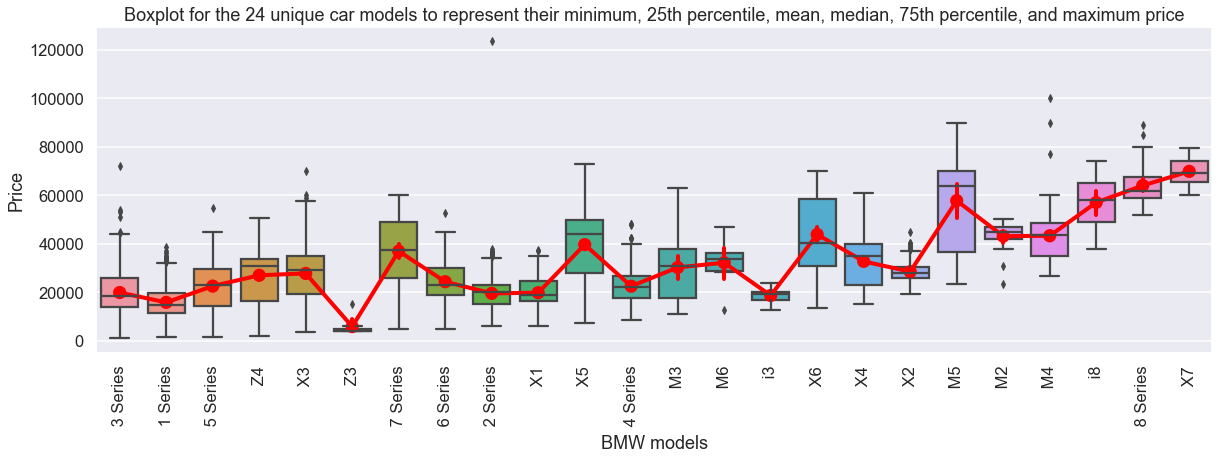

In [7]:
# create a new figure
plt.figure(figsize=(20,6))

# boxplot using seaborn and pandas
# dataset is sorted based on the 'price'
sns.boxplot(x='model', y='price', data=df.sort_values(by='price'))
sns.pointplot(x='model', y='price', data=df.sort_values(by='price'), color='red', alpha=0.5)
plt.title("Boxplot for the 24 unique car models to represent their minimum, 25th percentile, mean, median, 75th percentile, and maximum price")
plt.xlabel("BMW models")
plt.ylabel("Price")

# rotate the xticks by 90 degree to avoid overlapping
plt.xticks(rotation=90)
plt.show()

- X7 model cars have the highest average price
- 2 series car have an outlier car price of more than \\$120000
- M5 car has the higher interquartile range

The problem with boxplot is that it doesn't represent the mean and the number of samples (count of each model)

#### Boxplot of car prices from 1996 to 2020

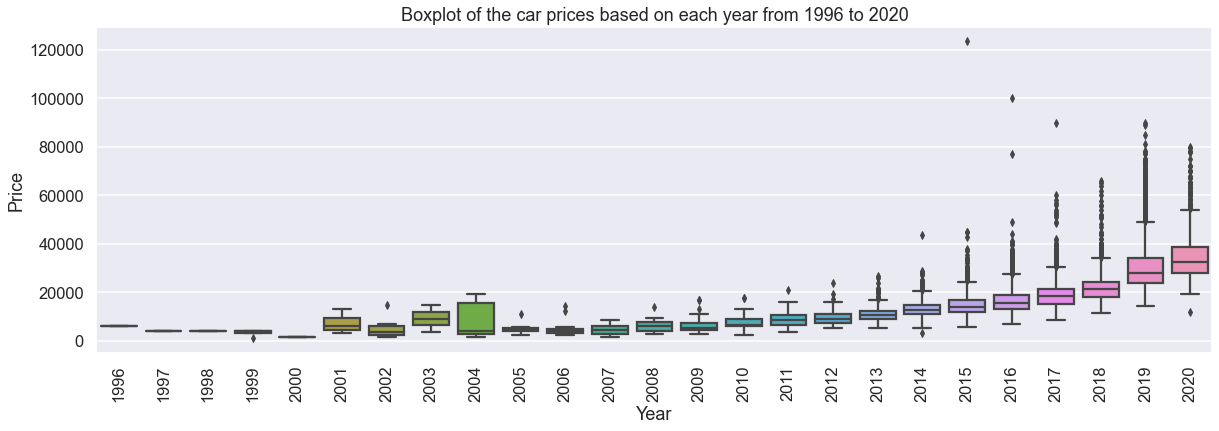

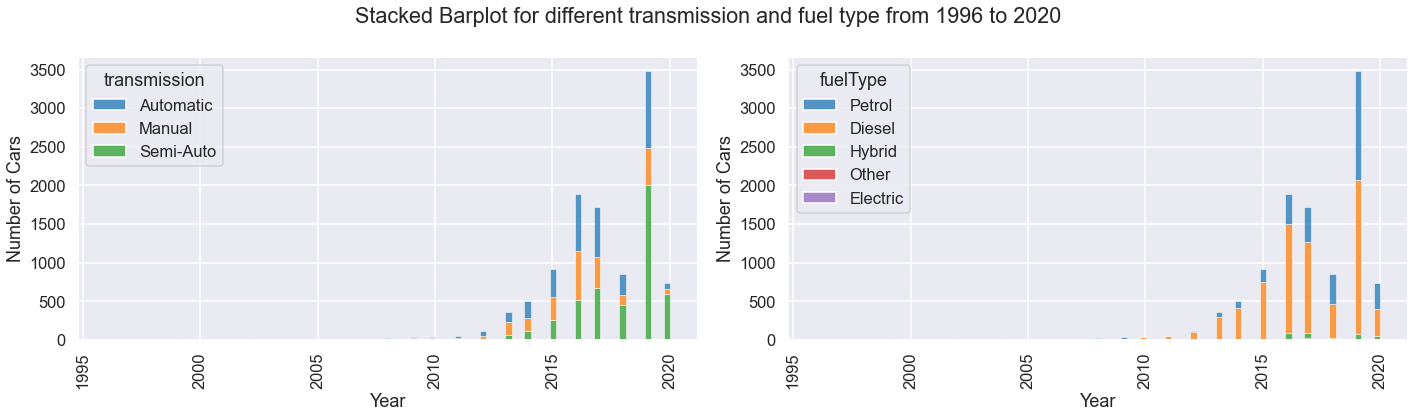

In [4]:
plt.figure(figsize=(20,6))

# dataset is sorted based on the 'year'
sns.boxplot(x='year', y='price', data=df.sort_values(by='year'))
plt.title("Boxplot of the car prices based on each year from 1996 to 2020")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

# stacked barplot
def stacked_barplot(hue):
    '''
    Args:
        hue (str): categorical variable
    Returns:
        Stacked barplot
    '''
    sns.histplot(x='year', hue=hue, data=df.sort_values(by='year'), multiple="stack")
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel("Number of Cars")


plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
stacked_barplot('transmission')

plt.subplot(1,2,2)
stacked_barplot('fuelType')

plt.suptitle("Stacked Barplot for different transmission and fuel type from 1996 to 2020")
plt.tight_layout()
plt.show()

- Based on year, the dataset contains lot of outliers which require further investigation
- Until 2010, the car price was below \\$20,000
- In 2020, used car prices vary from \\$20,000 to \\$80,000
- The dataset contains highest number of car samples from 2019
- Diesel and Petrol are the most dominant fuel type in this dataset

### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

In [9]:
def barplot_(col):
    '''
    This function finds the percentage of cars, average and total selling price by each category
    Args:
        col (str): categorical feature
    Returns:
        3 images of barplot
    '''
    # group the dataset by col and find the number of cars in each category, 
    # average selling price and total selling price 
    data = df.groupby(col)[['price']].agg(['count', 'mean', 'sum']).round(2)

    # reset the index
    data = data.reset_index()

    # sort the dataframe based on the 'count':number of cars in each category
    data = data.sort_values(by=('price','sum'), ascending=False)

    # convert the total selling price from $ to million $
    data[('price','sum')] = data[('price','sum')]/1000000

    # convert the number of cars to percentage of cars in each category
    data[('price','count')] = data[('price','count')]/100
    # display(data)

    plt.figure(figsize=(20,8))

    plt.subplot(1,3,1)
    sns.barplot(y=col, x=('price','count'), data=data, orient='h', color='blue', alpha=0.75)
    plt.title("Percentage of cars in each " + str(col))
    plt.xlabel("% of cars")
    plt.ylabel(col)

    plt.subplot(1,3,2)
    sns.barplot(y=col, x=('price','mean'), data=data, orient='h', color='green', alpha=0.75)
    plt.title("Average selling price of each car by " + str(col))
    plt.xlabel("Average selling price ($)")
    plt.ylabel("")

    plt.subplot(1,3,3)
    sns.barplot(y=col, x=('price','sum'), data=data, orient='h', color='orange')
    plt.title("Total selling price of each " + str(col))
    plt.xlabel("Total selling price ($ millions)")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

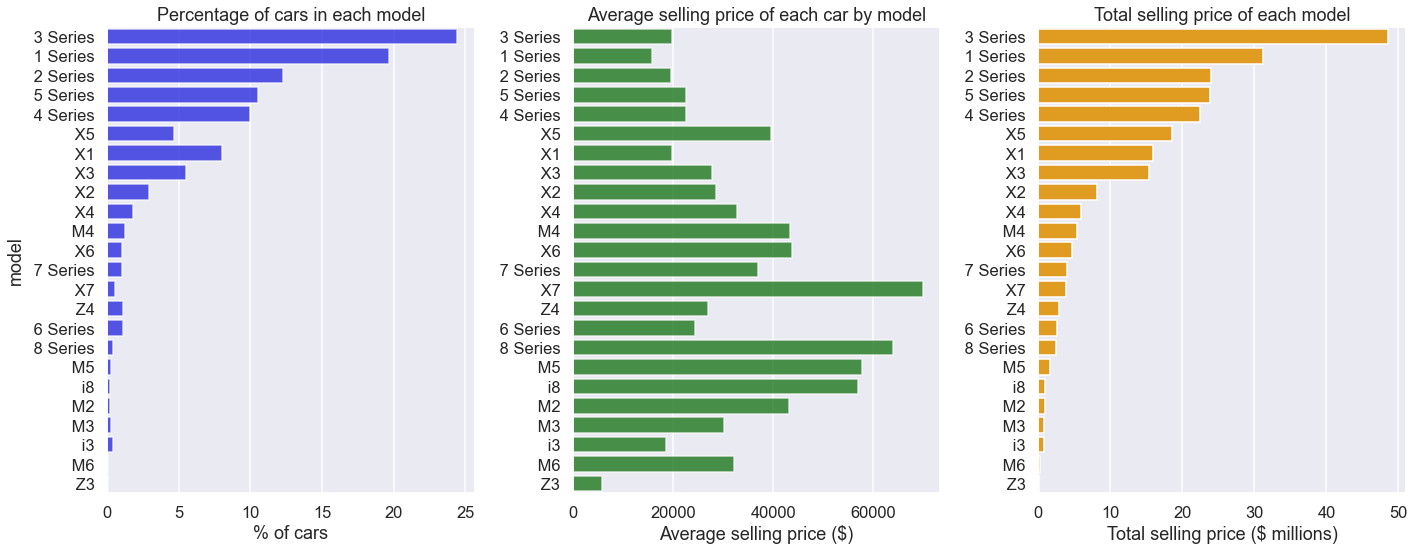

In [10]:
barplot_('model')

- Top 5 selling car models are 3 Series (24.4%), 1 Series (19.7%), 2 Series (12.3%), 5 Series (10.6%) and 4 Series (10%)
- Top 5 average selling price car models are X7 (\\$69,842), 8 Series (\\$63,997), M5 (\\$57,760), i8 (\\$57,012), and X6 (\\$43,838)
- Top 5 total selling price car models are 3 Series (\\$48.6M), 1 Series (\\$31.2M), 2 Series (\\$24M), 5 Series (\\$23.8M) and 4 Series (\\$22.4M)

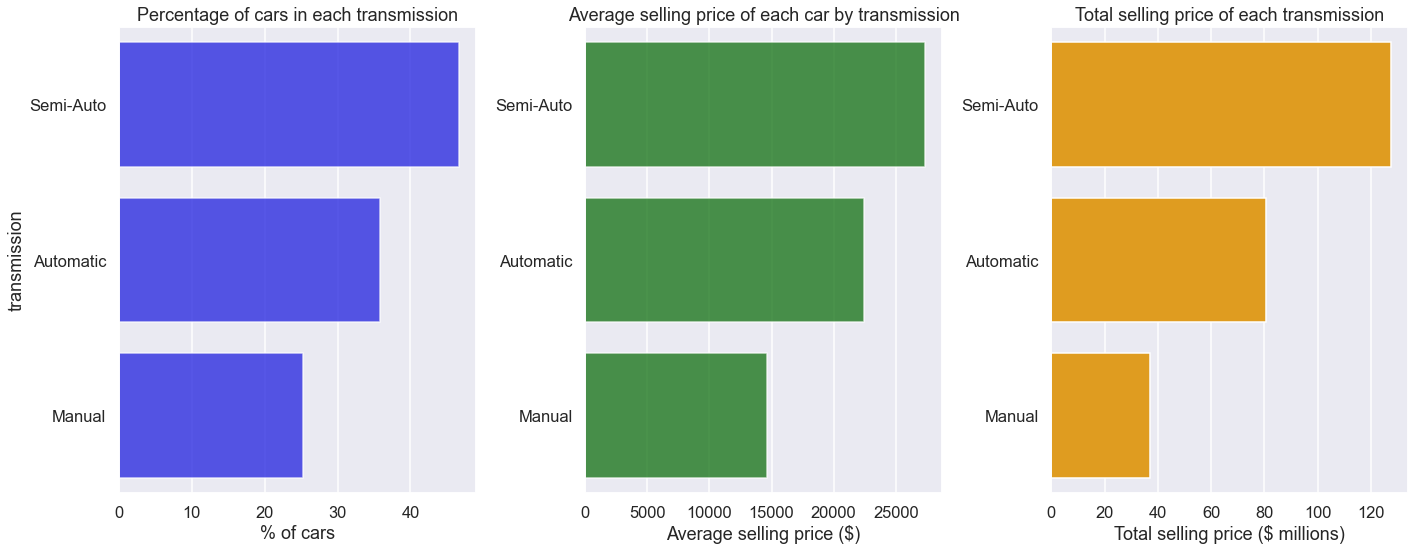

In [11]:
barplot_('transmission')

- From the above barplots, it's clear that the dataset contains most amount of data about the Semi-auto cars (47%)
- Total selling price of Semi-auto cars \\$127.6M, Automatic \\$80.4M, and Manual \\$37M

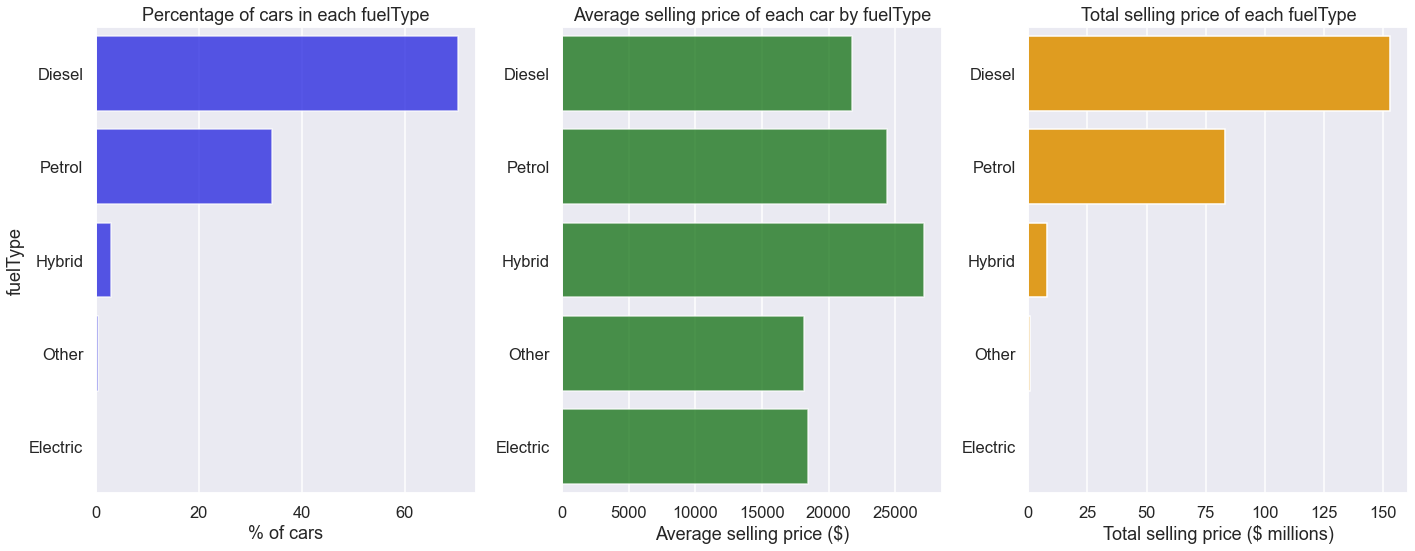

In [12]:
barplot_('fuelType')

- In this datset, most of the BMW cars are Diesel based 70.3% and second highest Petrol 34%
- Average price of a Hybrid car is greater than other fuel types
- Total selling price of cars by fuelType: Diesel based cars \\$153M, and Petrol based cars \\$83M

In [13]:
# separate the numeric columns
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

#### Distribution of the features and target variable for different transmission and fuel type

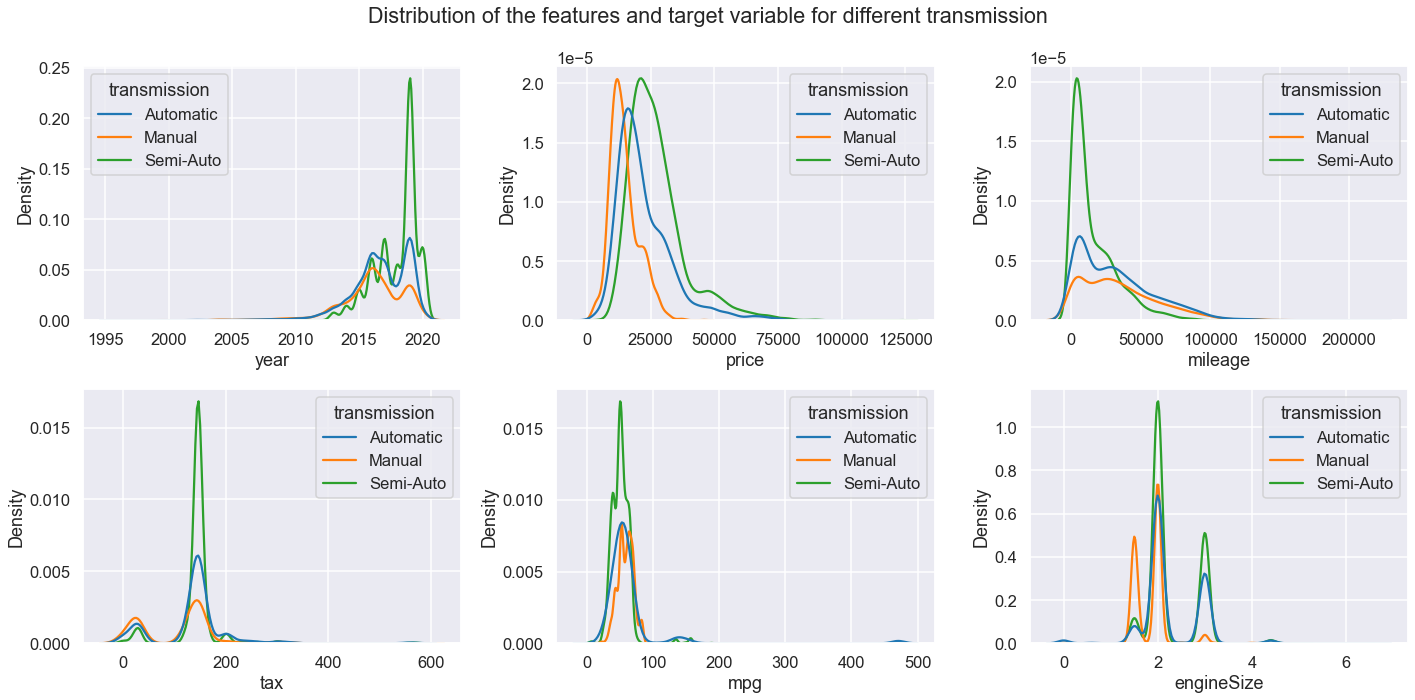

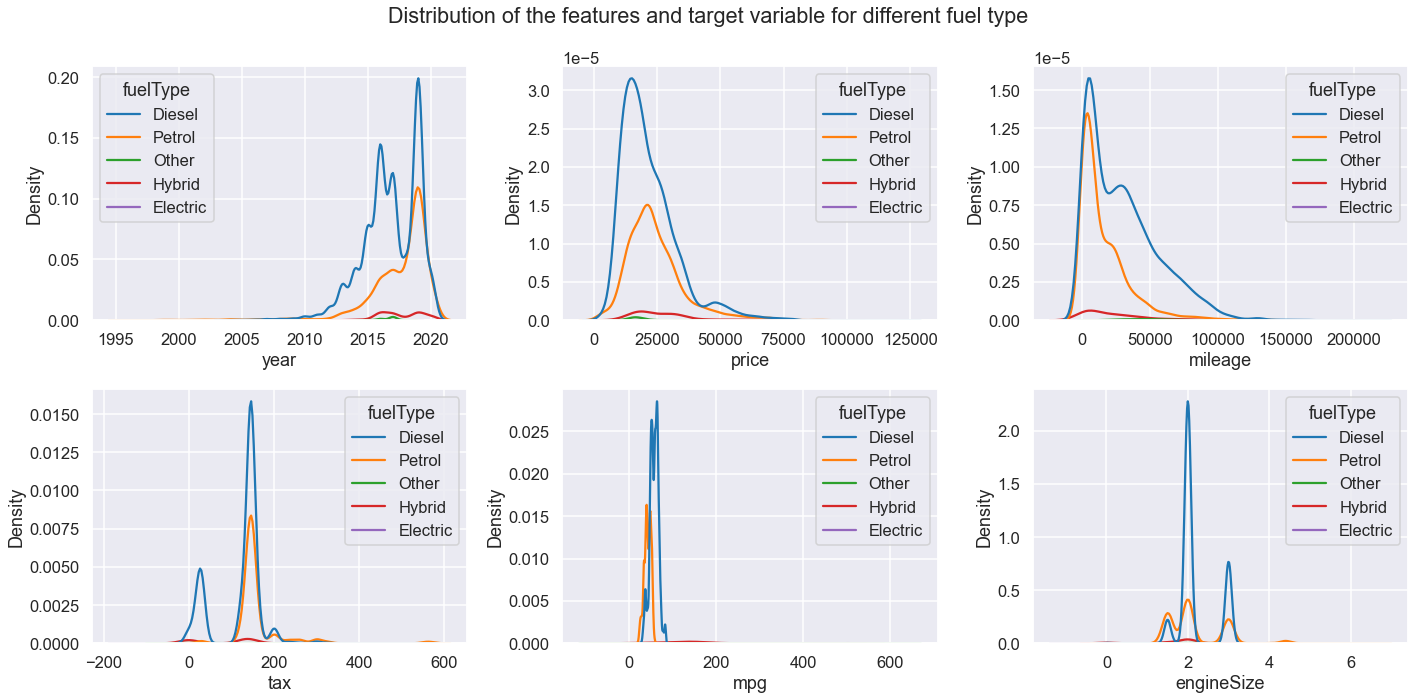

In [14]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='transmission', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different transmission")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='fuelType', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different fuel type")
plt.tight_layout()
plt.show()

From the above distribution plots, it's clear that the given features are not normally distributed. Few features also contain outliers. So we can perform data transformation before applying linear models or apply ensemble learning, where normally distributed features are not mandatory.

#### ECDF of the features and target variable

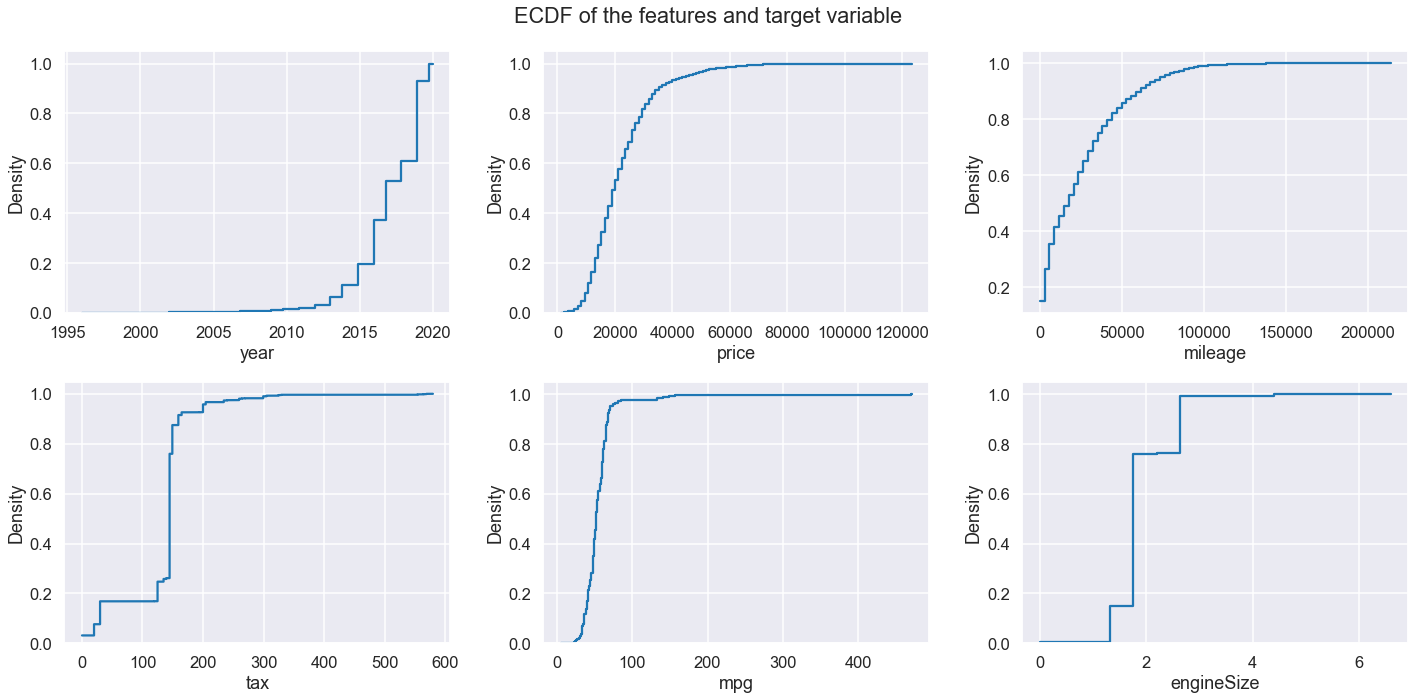

In [15]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.histplot(x=numeric_cols[col], data=df, stat="density", cumulative=True, fill=False, element="step")

plt.suptitle("ECDF of the features and target variable")
plt.tight_layout()
plt.show()

- 50% of the cars have price less or than equal \\$20,000
- 90% of the cars have price less or than equal \\$30,000
- 82% of the cars have mileage less or than equal 50,000. That means they are in quite good condition!
- nearly 98% of the cars have tax less than or equal to \\$200. Very few cars have tax greater than \\$200
- nearly 99% of the cars have mpg less than or equal to 100

#### Scatterplot and residualplot of the features and target variable 'price'

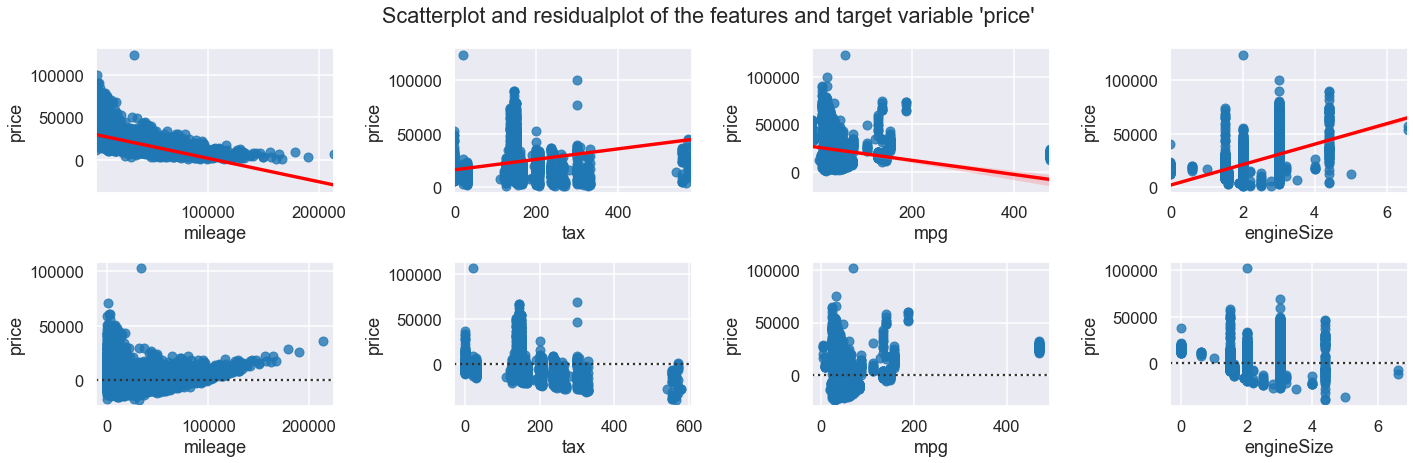

In [16]:
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize']

target = 'price'

plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    plt.subplot(4,4,i+1)
    sns.regplot(x=numeric_features[i], y=target, data=df, line_kws={"color": "red"})
    
    plt.subplot(4,4,i+5)
    sns.residplot(x=numeric_features[i], y=target, data=df)
    
plt.suptitle("Scatterplot and residualplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

If we try to fit the each feature with the target variable 'price', we can see that, we can't define them in linear regression: can't fit the feature and target in a straight line. Also, residuals are quite high.

#### Outlier removal

In [17]:
df = df[df['mpg'] <= 150]

'mpg' columns contain outliers because mpg for the bmw cars can't be more than 125
<br>Assumption: **'mpg' > 150 are outliers**

Number of rows after outlier removal  = 10686
<br>Number of rows before outlier removal = 10781

So, number of rows removed = 10781 - 10686 = 95

### Feature Enginerring

In [18]:
# create a new categorial feature 'Engine_Size' 
# engineSize 0L to 1L: small
# engineSize 1L to 2L: medium
# engineSize 2L to 3L: large
# engineSize 3L to 7L: Extra_Large
df['Engine_Size'] = pd.cut(df['engineSize'], 
                           bins=[-1,1,2,3,8], 
                           labels=["small", "medium", "large", "Extra_Large"])

# create a new categorial feature 'road_tax_range'
# road_tax_range $0 to $150: below_150
# road_tax_range $150 to $300: 150_300
# road_tax_range $300 to $450: 300_450
# road_tax_range $450 to $600: 450_600
df['road_tax_range'] = pd.cut(df['tax'], 
                              bins=[-1, 150, 300, 450, 600], 
                              labels=["below_150", "150_300", "300_450", "450_600"])

# create a new categorial feature 'mileage_range' 
# mileage_range 0 miles to 50000 miles : Excellent
# mileage_range 50000 miles to 100000 miles : Good
# mileage_range 100000 miles to 150000 miles : Medium
# mileage_range 150000 miles to 214000 miles : Bad
df['mileage_range'] = pd.cut(df['mileage'],
                             bins=[-1, 50000, 100000, 150000, 214000], 
                             labels=["Excellent", "Good", "Medium", "Bad"])

df['year'] = df['year'].astype('int')

# create a new feature 'car_age'
df ['car_age'] = 2021 - df['year']

# create a new categorial feature 'car_age_range' 
# car_age_range 0 to 5 years : <=5
# car_age_range 5 to 10 years : 5<age<=10
# car_age_range 10 to 15 years : 10<age<=15
# car_age_range 15 to 20 years : 15<age<=20
# car_age_range 20 to 25 years : 20<age<=25
df['car_age_range'] = pd.cut(df['car_age'],
                             bins=[-1, 5, 10, 15, 20, 25],
                             labels=["below_5", "between_5_to_10", "between_10_to_15", "between_15_to_20", "greater_than_20"])

df = df.drop('car_age', axis=1)

#### Scatterplot of the feature vs target variable based on 'transmission'

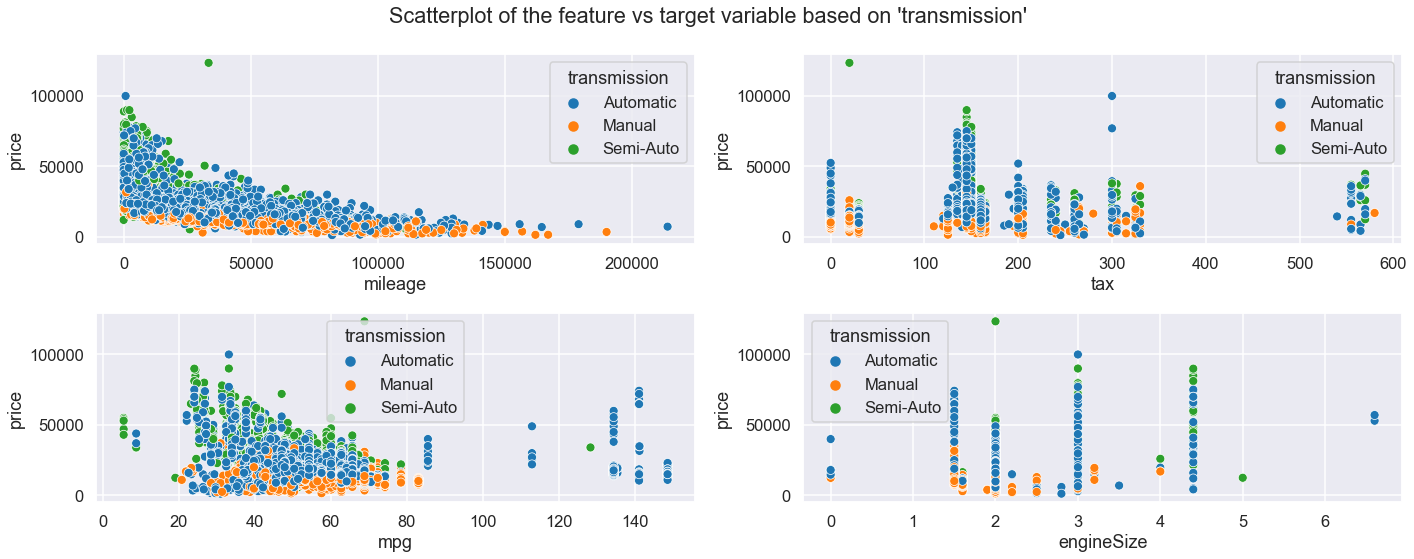

In [19]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='transmission')

plt.suptitle("Scatterplot of the feature vs target variable based on 'transmission'")
plt.tight_layout()   
plt.show()

- Road tax and engineSize variables don't look like numerical features. They seem categorical features.
- Manual transmission cars are cheap, semi-auto cars are the most expensive
- Manual transmission cars have lower mpg
- As the mileage increases, prices are decreasing. But for other features (tax, mpg, engineSize), the relationship with the price is non-linear

#### Scatterplot of the feature vs target variable based on 'mileage_range'

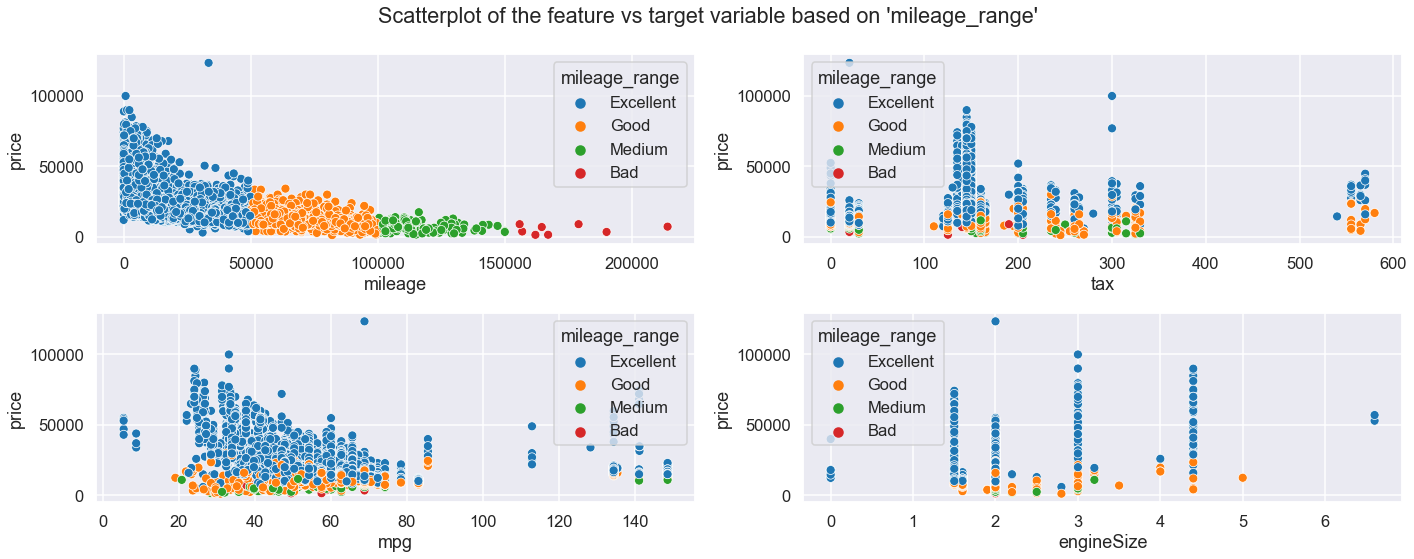

In [20]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='mileage_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'mileage_range'")
plt.tight_layout()   
plt.show()

- Excellent (lower mileage) condition cars have the best selling value
- mileage_range no specific relation with road tax, mpg, and engineSize

### Scatterplot of the feature vs target variable based on 'road_tax_range'

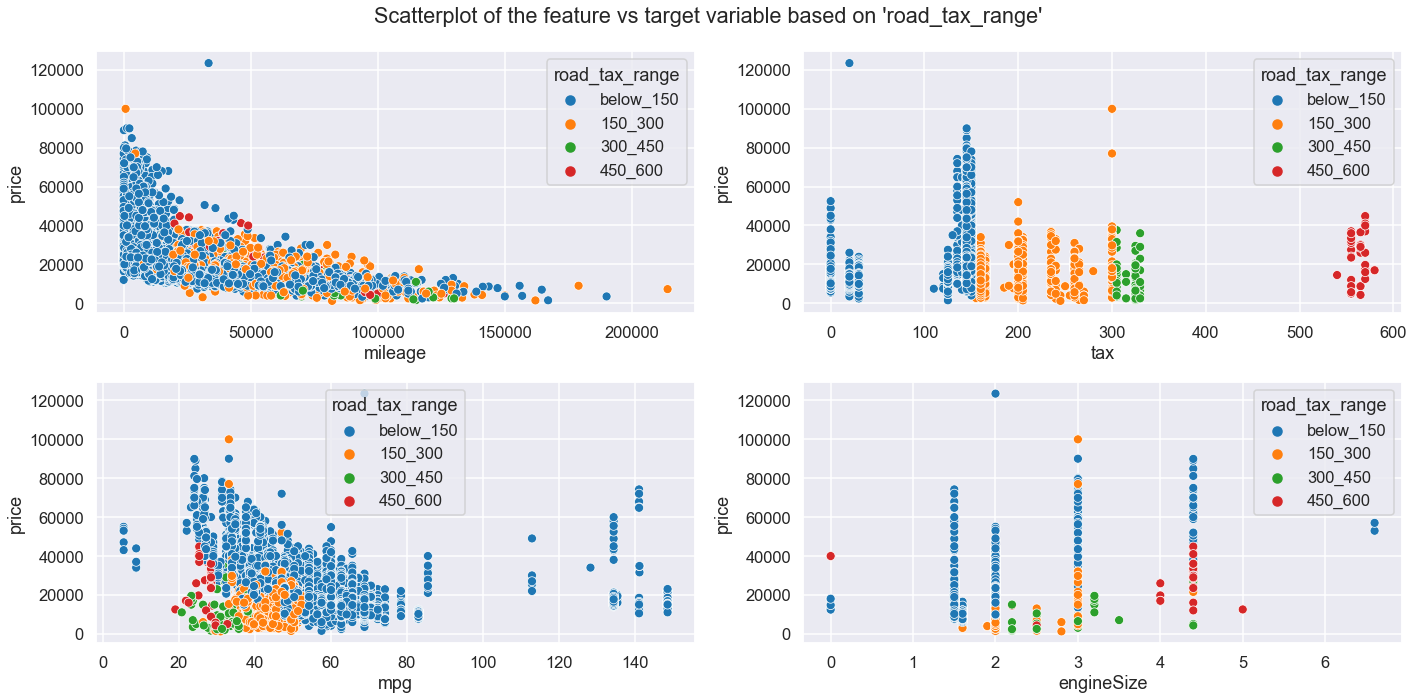

In [21]:
plt.figure(figsize=(20,10))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='road_tax_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'road_tax_range'")
plt.tight_layout()   
plt.show()

- Largest number of cars have tax below \\$150
- I was curious if there's any relation between the engineSize and tax, seems None. We'll look for it from a different angle.

### Scatterplot of the feature vs target variable based on 'Engine_Size'

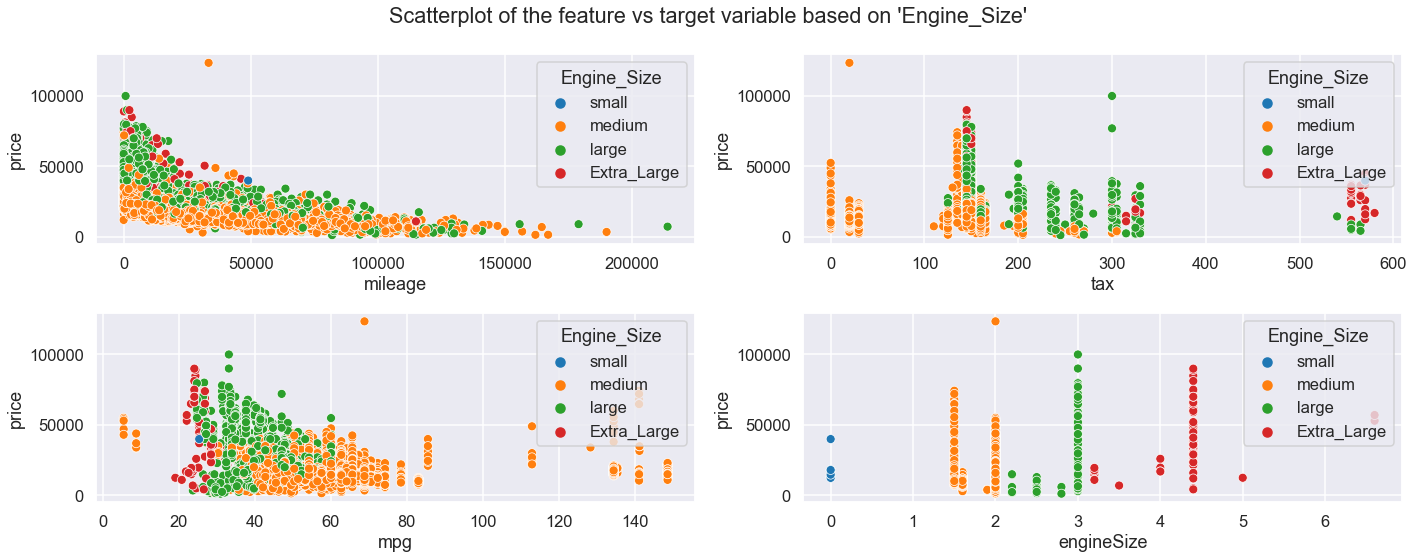

In [22]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='Engine_Size')

plt.suptitle("Scatterplot of the feature vs target variable based on 'Engine_Size'")
plt.tight_layout()   
plt.show()

- medium Engine_Size cars are less expensive and lower tax
- Finally, we can see that, if the Engine_Size increases, the tax is also increasing
- Engine_Size and mpg have a negative correlation. If the Engine_Size increases, the mpg is decreasing

#### Scatterplot of the feature vs target variable based on 'fuelType'

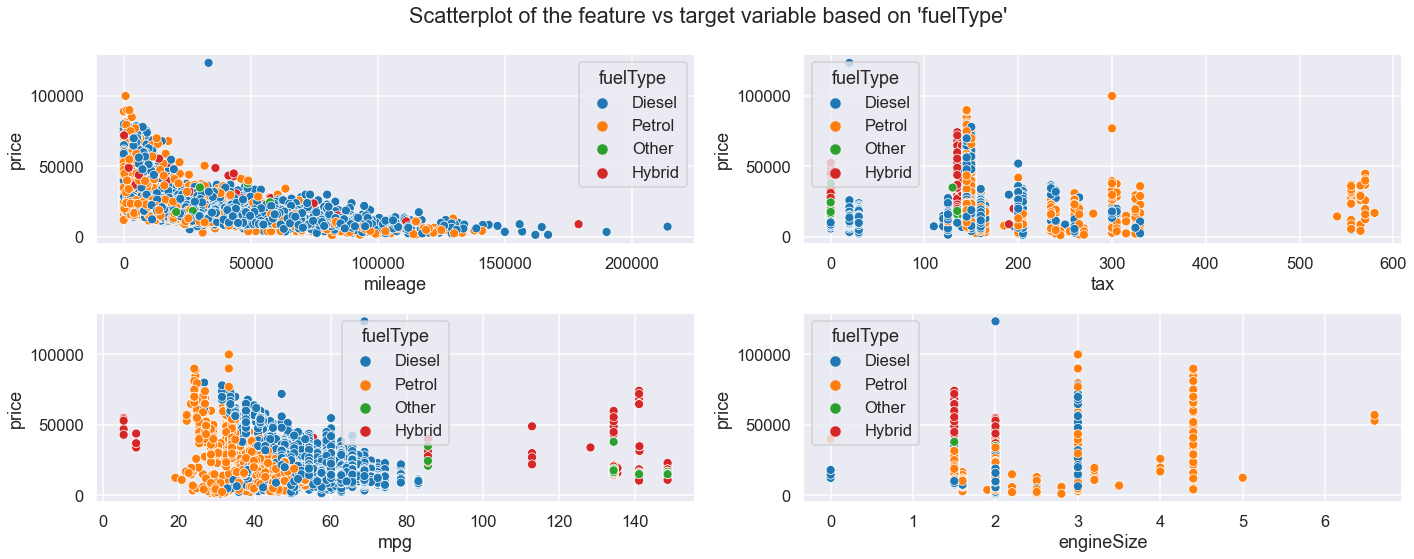

In [23]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='fuelType')

plt.suptitle("Scatterplot of the feature vs target variable based on 'fuelType'")
plt.tight_layout()   
plt.show()

- Diesel and Petrol based cars the popular choices
- Petrol based cars have higher road tax, lower mpg and larger engineSize
- Hybrid cars have higher mpg

### Boxenplots along with the pointplot for different categorical features

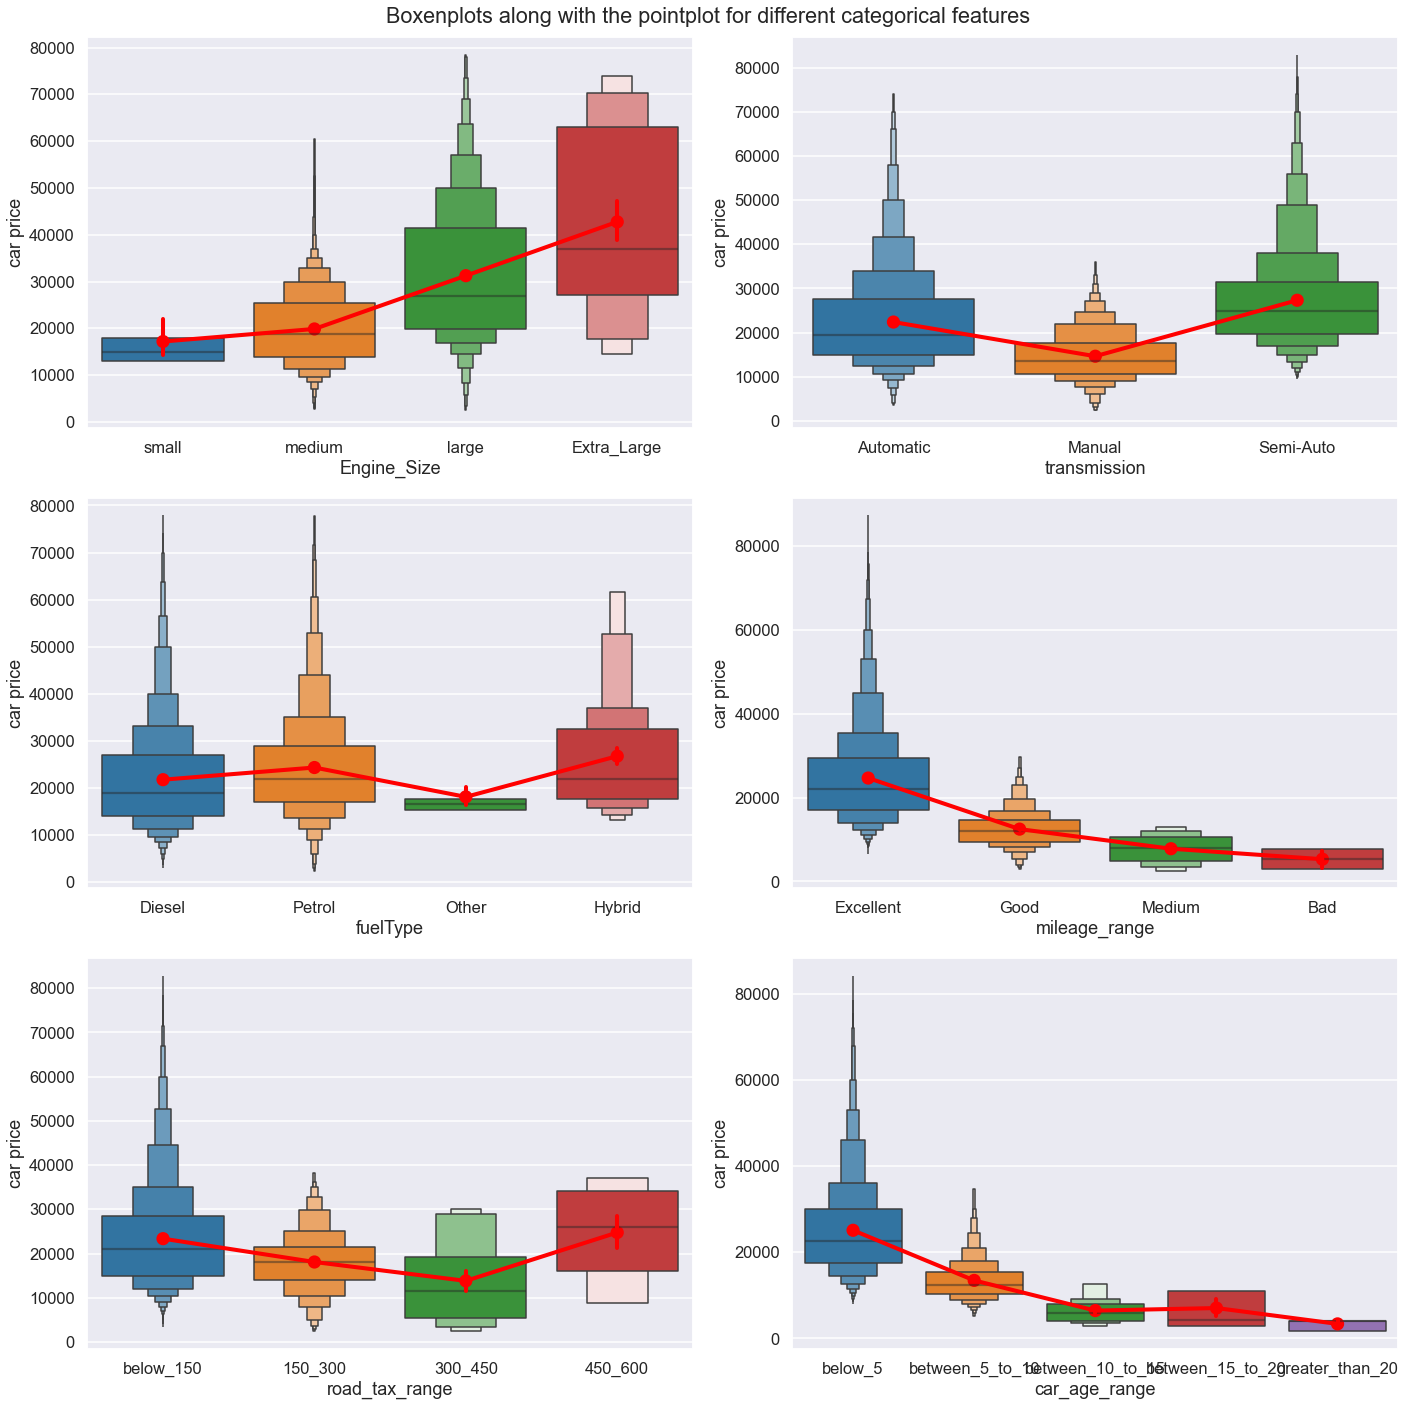

In [24]:
cal_cols = ['Engine_Size', 'transmission', 'fuelType', 'mileage_range', 'road_tax_range', 'car_age_range']

plt.figure(figsize=(20,20))

for col in range(len(cal_cols)):
    plt.subplot(3,2,col+1)
    sns.boxenplot(x=cal_cols[col], y='price', data=df, showfliers=False)
    sns.pointplot(x=cal_cols[col], y='price', data=df, color='red')
    plt.ylabel("car price")

plt.suptitle("Boxenplots along with the pointplot for different categorical features")
plt.tight_layout()
plt.show()

Boxenplot has all the statistical features of boxplot. In addition, it helps to understand the quantiles better.
- Manual transmission cars have low selling price and least popular. Automatic and semi-auto transmission cars prices vary to very cheap to expensive
- Diesel, Petrol and Hybrid cars are popular choices

Characateristics of the most expensive cars:
- Extra large engine size 
- Semi-auto transmission
- Hybrid 
- Excellent mileage range
- Most recent years model

In [25]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): correlation among the variables
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (10,10))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', annot=True, mask = mask) 
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

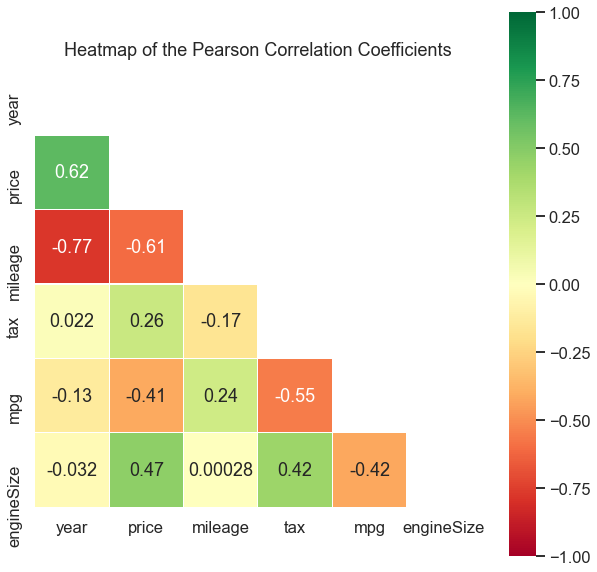

In [26]:
# set the background of the images
sns.set_style('whitegrid')

correlation_heatmap(df[numeric_cols])

- The price increases when engineSize increases
- Car price has a negative correlation with the mpg. That's quite opposite what we think- A good car should have high mpg
- If the mileage increases, the car price drops
- Road tax has a positive correlation with the engineSize
- As the engineSize increases, the mpg decreases
- Car price has a very positive correlation with the year


In [27]:
display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Engine_Size,road_tax_range,mileage_range,car_age_range
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,medium,below_150,Good,between_5_to_10
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,medium,below_150,Excellent,below_5
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,large,150_300,Good,below_5
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,medium,below_150,Excellent,below_5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,large,150_300,Excellent,between_5_to_10


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Engine_Size,road_tax_range,mileage_range,car_age_range
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,medium,below_150,Excellent,below_5
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,medium,below_150,Excellent,below_5
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,medium,150_300,Excellent,below_5
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,medium,below_150,Excellent,between_5_to_10
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0,medium,below_150,Good,below_5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 10780
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   model           10686 non-null  object  
 1   year            10686 non-null  int32   
 2   price           10686 non-null  int64   
 3   transmission    10686 non-null  object  
 4   mileage         10686 non-null  int64   
 5   fuelType        10686 non-null  object  
 6   tax             10686 non-null  int64   
 7   mpg             10686 non-null  float64 
 8   engineSize      10686 non-null  float64 
 9   Engine_Size     10686 non-null  category
 10  road_tax_range  10686 non-null  category
 11  mileage_range   10686 non-null  category
 12  car_age_range   10686 non-null  category
dtypes: category(4), float64(2), int32(1), int64(3), object(3)
memory usage: 1.1+ MB


In [29]:
df.to_csv("bmw_used_cars.csv", index=False)